<a href="https://colab.research.google.com/github/cnyakundi/respiratory_disease_detection/blob/Natasha/Respiratory_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing and Tidying the Dataset

In [2]:
#Loading dataset

data = pd.read_csv('/content/Data_Entry_2017_v2020.csv')

#Previewing data
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [3]:
#Dropping unnecessary columns
data.drop(['Image Index', 'Follow-up #', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]'], axis=1, inplace=True)


In [5]:
data.head()

,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,Cardiomegaly,1,57,M,PA
1,Cardiomegaly|Emphysema,1,58,M,PA
2,Cardiomegaly|Effusion,1,58,M,PA
3,No Finding,2,80,M,PA
4,Hernia,3,74,F,PA


In [6]:
#Checking for null values
data.isnull().sum()

Finding Labels    0
Patient ID        0
Patient Age       0
Patient Gender    0
View Position     0
dtype: int64

There are no null values in the dataset.

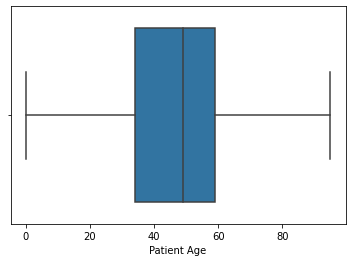

In [65]:
#Checking for Outliers
sns.boxplot(data['Patient Age'])

There are no outliers in our dataset.

In [8]:
# Checking the datatypes within the dataset
data.dtypes

Finding Labels    object
Patient ID         int64
Patient Age        int64
Patient Gender    object
View Position     object
dtype: object

In [28]:
# Re-name the first column

data.rename(columns = {'Finding Labels': 'Respiratory_Disease'}, inplace=True)
data.head()

,Respiratory_Disease,Patient ID,Patient Age,Patient Gender,View Position
0,Cardiomegaly,1,57,M,PA
1,Cardiomegaly|Emphysema,1,58,M,PA
2,Cardiomegaly|Effusion,1,58,M,PA
3,No Finding,2,80,M,PA
4,Hernia,3,74,F,PA


In [29]:
# Checking the shape of the dataset

print('The Dataset contains ',data.shape[0],' rows and ',data.shape[1],' columns.')

The Dataset contains  112120  rows and  5  columns.


## Exploratory Data Analysis

### Univariate Analysis

In [35]:
data['Patient Age'].unique()

array([57, 58, 80, 74, 75, 76, 77, 78, 79, 81, 82, 69, 70, 68, 72, 84, 56,
       60, 61, 71, 66, 47, 48, 53, 63, 52, 73, 59, 54, 67, 62, 46, 87, 91,
       92, 55, 64, 65, 44, 49, 51, 50, 83, 33, 42, 86, 45, 24, 31, 89, 90,
       94, 39, 85, 29, 30, 32, 27, 28, 37, 40, 36, 38, 35, 43, 25, 41, 34,
       22, 21, 23, 26, 17, 18, 19, 20, 16, 88, 13, 14, 15, 11, 12,  9, 10,
       93,  8,  7,  6,  5,  4,  3,  2,  1,  0, 95])

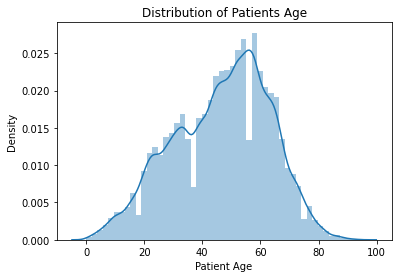

In [62]:
plt.plot()
sns.distplot(data['Patient Age'])
plt.title('Distribution of Patients Age')
plt.show()

The dataset has a normal distribution.

The most affected patients are between ages of 50 and 60.

In [32]:
# Finding out the total number of Males and Females in the Dataset

data['Patient Gender'].value_counts()

M    63340
F    48780
Name: Patient Gender, dtype: int64

There are 63,340 Males and 48,780 Females in the Dataset. Therefore there are more Males who suffer from Respiratory Diseases.

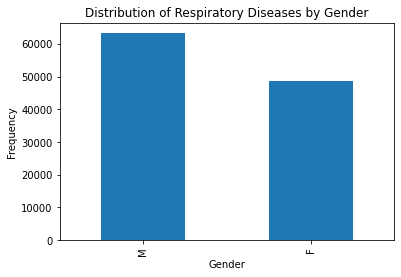

In [63]:
# Plotting a Bar Graph of the Distribution of Genders within the dataset.

data['Patient Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Respiratory Diseases by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

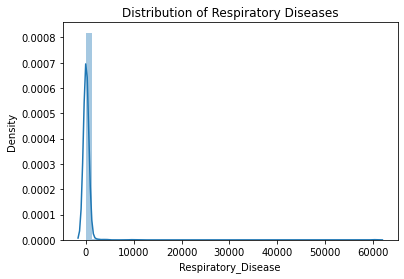

In [61]:

plt.plot()
sns.distplot(data['Respiratory_Disease'].value_counts())
plt.title('Distribution of Respiratory Diseases')
plt.show()

The data is normally distributed.

### Bivariate Analysis

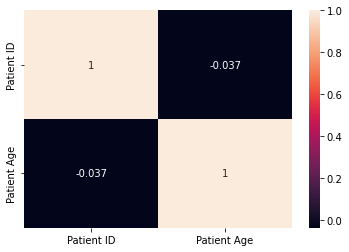

In [46]:
#Checking for correlated columns

sns.heatmap(data.corr(),annot=True)

The data has no correlation between Patients Age and ID.